Deep Learning Assignment No:2

Title:Implementing Feedforward neural network with Keras and Tensorflow

Name:Pranit Dilip Menkar

BEIT

Roll no: 49

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse as ap


In [ ]:
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

[INFO] accessing MNIST...
11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [ ]:
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=30, batch_size=128)

[INFO] training network...
Epoch 1/30
469/469 [==============================] - 4s 8ms/step - loss: 2.2853 - accuracy: 0.1891 - val_loss: 2.2428 - val_accuracy: 0.2862
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 2.2073 - accuracy: 0.4050 - val_loss: 2.1639 - val_accuracy: 0.3989
Epoch 3/30
469/469 [==============================] - 3s 7ms/step - loss: 2.1146 - accuracy: 0.5338 - val_loss: 2.0511 - val_accuracy: 0.5430
Epoch 4/30
469/469 [==============================] - 3s 7ms/step - loss: 1.9803 - accuracy: 0.5965 - val_loss: 1.8871 - val_accuracy: 0.6196
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 1.7940 - accuracy: 0.6371 - val_loss: 1.6754 - val_accuracy: 0.6695
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 1.5750 - accuracy: 0.6759 - val_loss: 1.4509 - val_accuracy: 0.6994
Epoch 7/30
469/469 [==============================] - 5s 10ms/step - loss: 1.3637 - accuracy: 0.7108 - val_loss: 1.2545 -

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.94      0.97      0.96      1135
           2       0.91      0.86      0.88      1032
           3       0.88      0.89      0.89      1010
           4       0.87      0.91      0.89       982
           5       0.85      0.81      0.83       892
           6       0.91      0.92      0.91       958
           7       0.91      0.89      0.90      1028
           8       0.86      0.84      0.85       974
           9       0.87      0.85      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



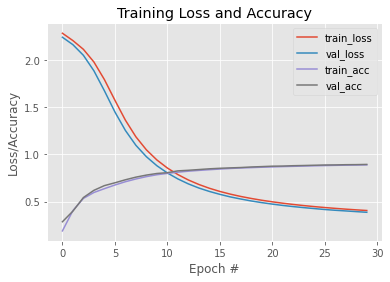

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 30), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 30), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
